<a href="https://colab.research.google.com/github/kmsingh017/Cat-vs-Dog-Classifier/blob/main/CatvsdogClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:32<00:00, 39.6MB/s]
100% 1.06G/1.06G [00:33<00:00, 34.6MB/s]


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [11]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=tf.keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [21]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [23]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 110ms/step - loss: 1.5096 - accuracy: 0.5992 - val_loss: 0.5986 - val_accuracy: 0.6992
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5613 - accuracy: 0.7153 - val_loss: 0.5192 - val_accuracy: 0.7460
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4769 - accuracy: 0.7724 - val_loss: 0.4738 - val_accuracy: 0.7772
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4142 - accuracy: 0.8106 - val_loss: 0.4340 - val_accuracy: 0.7930
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3634 - accuracy: 0.8397 - val_loss: 0.4939 - val_accuracy: 0.7576
Epoch 6/10
625/625 [==============================] - 70s 111ms/step - loss: 0.2974 - accuracy: 0.8745 - val_loss: 0.6593 - val_accuracy: 0.7338
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2227 - accuracy: 0.9089 - val_loss: 0.8386 - val_ac

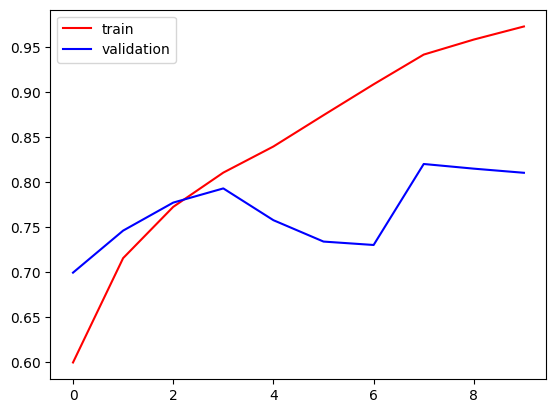

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

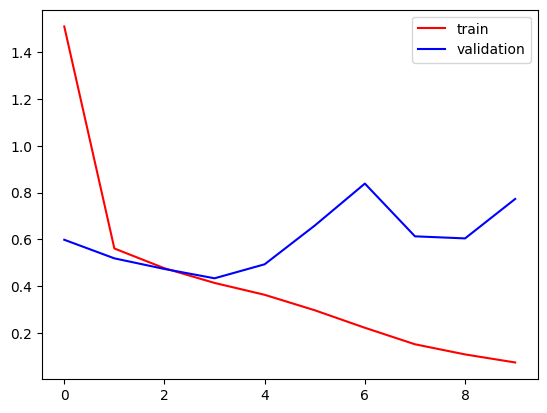

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [28]:
import cv2

In [42]:
img=cv2.imread('dog.jpg')

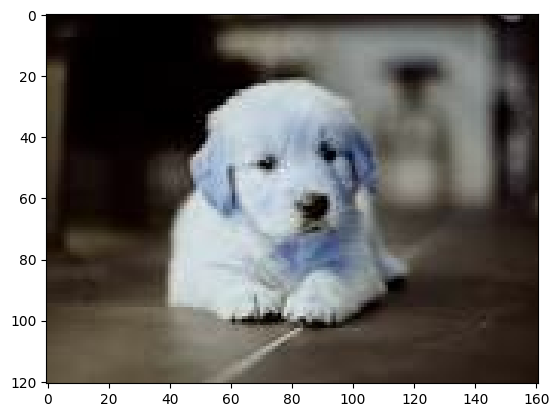

In [43]:
plt.imshow(img)

In [44]:
img.shape

(121, 161, 3)

In [45]:
img=cv2.resize(img,(256,256))

In [46]:
img=np.reshape(img,(1,256,256,3))

In [47]:
model.predict(img)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)